In [15]:
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.optimizers import RMSprop

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-09 08:12:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.164.176, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   167MB/s    in 0.9s    

2021-01-09 08:12:48 (167 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [14]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-09 08:12:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-01-09 08:12:54 (124 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [16]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()


In [17]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [27]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir)
print(validation_horse_names[:10])

['horse40-5.png', 'horse06-0.png', 'horse22-0.png', 'horse41-4.png', 'horse19-5.png', 'horse48-5.png', 'horse44-8.png', 'horse16-8.png', 'horse33-9.png', 'horse11-6.png']
['human11-20.png', 'human17-25.png', 'human05-17.png', 'human13-04.png', 'human04-22.png', 'human12-22.png', 'human02-10.png', 'human17-01.png', 'human03-28.png', 'human14-24.png']
['horse3-099.png', 'horse4-599.png', 'horse2-582.png', 'horse1-411.png', 'horse3-541.png', 'horse5-235.png', 'horse4-202.png', 'horse2-040.png', 'horse5-405.png', 'horse1-510.png']
['horse3-099.png', 'horse4-599.png', 'horse2-582.png', 'horse1-411.png', 'horse3-541.png', 'horse5-235.png', 'horse4-202.png', 'horse2-040.png', 'horse5-405.png', 'horse1-510.png']


In [29]:
#%matplotlib inline

nrows = 4
ncols =4

pic_index = 0

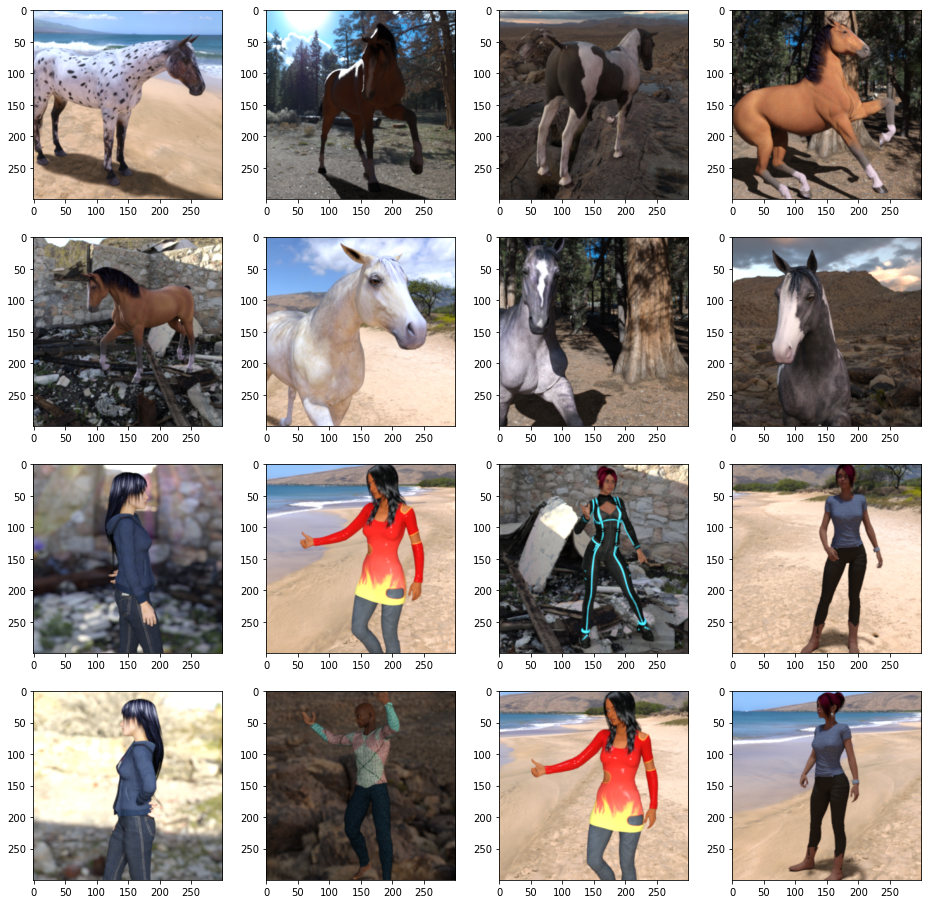

In [31]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows *4)

pic_index +=8
next_horse_pix =[os.path.join(train_horse_dir, fname)
          for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix =[os.path.join(train_human_dir, fname)
          for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('On')

  img = mping.imread(img_path)
  plt.imshow(img)

plt.show()

In [36]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3),activation='relu', input_shape=(300, 300, 3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),


            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),


            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
          

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 64)        3

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size= (300, 300),
    batch_size=128,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [47]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs=15,
    verbose = 1,
    validation_data= validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 15s 863ms/step - loss: 0.7993 - accuracy: 0.5139 - val_loss: 0.6776 - val_accuracy: 0.5078
Epoch 2/15
8/8 [==============================] - 8s 943ms/step - loss: 0.7931 - accuracy: 0.5521 - val_loss: 0.5474 - val_accuracy: 0.9141
Epoch 3/15
8/8 [==============================] - 7s 891ms/step - loss: 0.7611 - accuracy: 0.5994 - val_loss: 0.7211 - val_accuracy: 0.5625
Epoch 4/15
8/8 [==============================] - 7s 880ms/step - loss: 0.5336 - accuracy: 0.6673 - val_loss: 0.9614 - val_accuracy: 0.8359
Epoch 5/15
8/8 [==============================] - 7s 894ms/step - loss: 0.5495 - accuracy: 0.7982 - val_loss: 0.4084 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 7s 916ms/step - loss: 0.2698 - accuracy: 0.9313 - val_loss: 0.5663 - val_accuracy: 0.8906
Epoch 7/15
8/8 [==============================] - 7s 896ms/step - loss: 0.2601 - accuracy: 0.8996 - val_loss: 0.8090 - val_accuracy: 0.8867
Epoch 8/15
8/8 [===

In [49]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")